## 1. Combined Cycle Power Plant Data Set The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### (a) Download the Combined Cycle Power Plantdata from:
### https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

#### I have found that sheet1 to sheet5 is the same, just rearrage the order, so I will use sheet1 only to calculate all the anwser

In [2]:
data_sheet1_df = pd.read_excel("Folds5x2_pp.xlsx", sheet_name = 'Sheet1')

In [3]:
data_sheet1_np = pd.read_excel("Folds5x2_pp.xlsx", sheet_name = 'Sheet1').to_numpy()

### (b) Exploring the data:

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
print('There are', data_sheet1_df.shape[0], 'rows in this data set')
print('There are', data_sheet1_df.shape[1], 'columns in this data set')
print('The rows indicate what value for a category, the columns indicate how many categories.')  

There are 9568 rows in this data set
There are 5 columns in this data set
The rows indicate what value for a category, the columns indicate how many categories.


### ii. Make pairwise scatterplots of all the varianbles in the data set including the
### predictors (independent variables) with the dependent variable. Describe your findings.

In [5]:
data_sheet1_df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


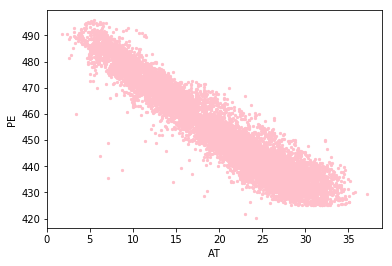

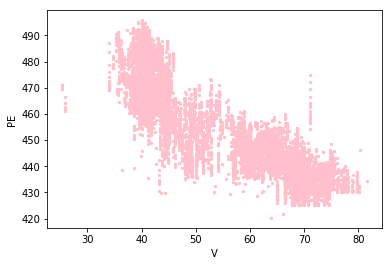

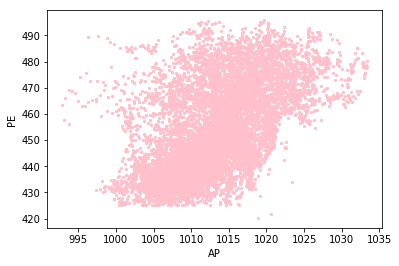

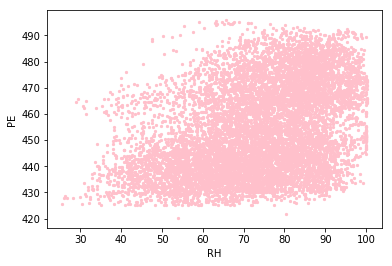

In [6]:
columns = ['AT', 'V', 'AP', 'RH']
for i in columns:
    data_sheet1_df.plot.scatter(x = i, y = 'PE', c = 'pink', s = 5)
# marker='o', c='PE', , colormap = 'viridis'

1. For PE to AT, we can find that as a bigger number of AT, we will get a smaller PE. The Correlation coefficient is near -1.
2. For PE to V, we can find that as a bigger number of AT, we also get a smaller PE. However, 
   the correlation is not as higher as PE to AT, the correlation coefficient may probably at the interval [-0.5, -0.9].
3. For PE to AP, we can find that as a bigger number of AT, we will get a bigger PE in general. But, 
   the correlation is not really obvious, the correlation coefficient may probably at the interval [0.3, 0.6].
4. For PE to RH, we can find that as a bigger number of AT, we will get a bigger PE in general. But, 
   the correlation is not obvious, the correlation coefficient may probably less than 0.4.

### iii. What are the mean, the median, range, first and third quartiles, and interquartile 
###       ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
import statistics
from scipy.stats import iqr
table = []
for i in range(5):
    statistics.mean(data_sheet1_np[:,i]) # Mean
    statistics.median(data_sheet1_np[:,i]) # Median
    min(data_sheet1_np[:,i]) # for range
    max(data_sheet1_np[:,i])
    np.quantile(data_sheet1_np[:,i], .25)  # First and Third quartiles
    np.quantile(data_sheet1_np[:,i], .75)
    iqr(data_sheet1_np[:,i])
    table.append([statistics.mean(data_sheet1_np[:,i]),statistics.median(data_sheet1_np[:,i]),max(data_sheet1_np[:,i]) - 
                  min(data_sheet1_np[:,i]),np.quantile(data_sheet1_np[:,i], .25),np.quantile(data_sheet1_np[:,i], .75),
                 iqr(data_sheet1_np[:,i])])

In [8]:
table_df = pd.DataFrame(table)
table_df = table_df.rename({0:'Mean', 1:'Median', 2:'Range', 3:'First quartile', 4:'Third quartile', 5:'Interquartile'},axis = 1)
table_df = table_df.rename({0:'AT', 1:'V', 2:'AP', 3:'RH', 4:'PE'},axis = 0)
table_df

,Mean,Median,Range,First quartile,Third quartile,Interquartile
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) For each predictor, fit a simple linear regression model to predict the response.
### Describe your results. In which of the models is there a statistically significant
### association between the predictor and the response? Create some plots to back
### up your assertions. Are there any outliers that you would like to remove from
### your data for each of these regression tasks?

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
AT = data_sheet1_np[:,0]
V = data_sheet1_np[:,1]
AP = data_sheet1_np[:,2]
RH = data_sheet1_np[:,3]
PE = data_sheet1_np[:,4]

In [10]:
model_use = [AT, V, AP, RH]

In [11]:
count = 0
beta_linear = []
for i in model_use:
    model.fit(i.reshape(-1, 1), PE)
    model = LinearRegression().fit(i.reshape(-1, 1), PE)
    r_sq = model.score(i.reshape(-1, 1), PE) #coefficient of determination (corr ** 2)
    corr = np.corrcoef(i, PE)[0,1] #correlation of coefficient 
    model.intercept_ #b
    beta_linear.append(model.coef_) #a
    who = columns[count]
    count = count + 1 
    print('For', who, 'to PE, the regression line is y = ', model.coef_, 'x +', model.intercept_, '\n',
          ', the correlation of coefficient is', corr, '\n',
         ', the correlation of determination is', r_sq)

For AT to PE, the regression line is y =  [-2.17131996] x + 497.03411989276674 
 , the correlation of coefficient is -0.9481284704167595 
 , the correlation of determination is 0.8989475964148236
For V to PE, the regression line is y =  [-1.16813513] x + 517.801526308386 
 , the correlation of coefficient is -0.8697803096577879 
 , the correlation of determination is 0.7565177870683979
For AP to PE, the regression line is y =  [1.48987167] x + -1055.2609889844396 
 , the correlation of coefficient is 0.5184290273615736 
 , the correlation of determination is 0.2687686564110674
For RH to PE, the regression line is y =  [0.4556501] x + 420.96176615548393 
 , the correlation of coefficient is 0.38979409979010177 
 , the correlation of determination is 0.15193944023117567


The models of AT to PE has a statistically significant association between the predictor and the response 
due to it's high correlation of determination.

Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

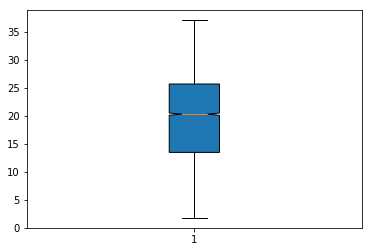

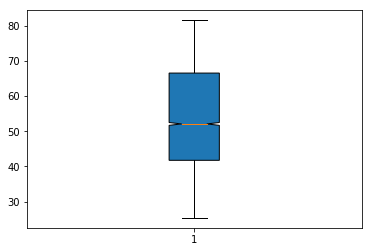

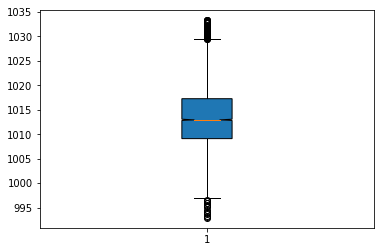

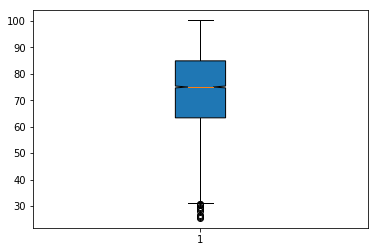

In [12]:
for i in model_use:
    box = plt.boxplot(i, notch=True, patch_artist=True)
    plt.show()
## Find Outliers, points that outside the box

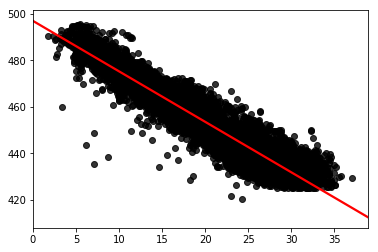

In [13]:
import seaborn as sns
sns.regplot(x = AT, y = PE, scatter_kws={"color": "black"}, line_kws={"color": "red"})

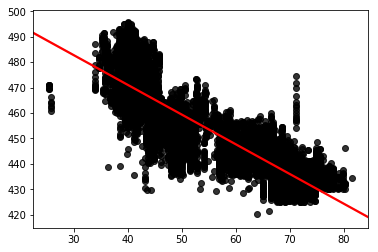

In [14]:
sns.regplot(x = V, y = PE, scatter_kws={"color": "black"}, line_kws={"color": "red"})

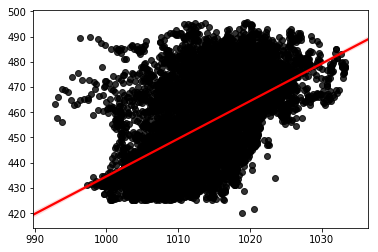

In [15]:
sns.regplot(x = AP, y = PE, scatter_kws={"color": "black"}, line_kws={"color": "red"})

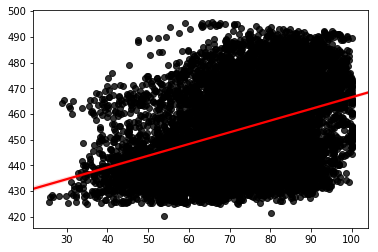

In [16]:
sns.regplot(x = RH, y = PE, scatter_kws={"color": "black"}, line_kws={"color": "red"})

### (d) Fit a multiple regression model to predict the response using all of the predictors.
### Describe your results. For which predictors can we reject the null hypothesis H0 : Bj = 0?

In [17]:
multi_model = LinearRegression()
multi_model.fit(data_sheet1_df[columns], data_sheet1_df['PE'])
print(multi_model.coef_)
print(multi_model.intercept_)

[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
454.6092743153102


In [18]:
beta_linear

[array([-2.17131996]),
 array([-1.16813513]),
 array([1.48987167]),
 array([0.4556501])]

In [19]:
print(model_use)

[array([14.96, 25.18,  5.11, ..., 31.32, 24.48, 21.6 ]), array([41.76, 62.96, 39.4 , ..., 74.33, 69.45, 62.52]), array([1024.07, 1020.04, 1012.16, ..., 1012.92, 1013.86, 1017.23]), array([73.17, 59.08, 92.14, ..., 36.48, 62.39, 67.87])]


In [20]:
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(data_sheet1_df[columns]) #data_sheet1_df[columns]
est = sm.OLS(data_sheet1_df['PE'], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:17   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


All predictors can we reject the null hypothesis H0 : Bj = 0 since all p-value < 0.05

### (e) How do your results from 1c compare to your results from 1d? Create a plot
### displaying the univariate regression coefficients from 1c on the x-axis, and the
### multiple regression coefficients from 1d on the y-axis. That is, each predictor is
### displayed as a single point in the plot. Its coefficient in a simple linear regression
### model is shown on the x-axis, and its coefficient estimate in the multiple linear
### regression model is shown on the y-axis.

In [21]:
multi_model.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

In [22]:
beta_linear

[array([-2.17131996]),
 array([-1.16813513]),
 array([1.48987167]),
 array([0.4556501])]

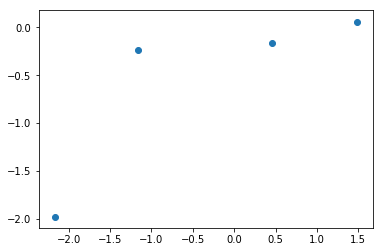

In [23]:
plt.scatter(beta_linear, multi_model.coef_)

### (f) Is there evidence of nonlinear association between any of the predictors and the
### response? To answer this question, for each predictor X, fit a model of the form1

In [24]:
data_sheet1_np[:,3]

array([73.17, 59.08, 92.14, ..., 36.48, 62.39, 67.87])

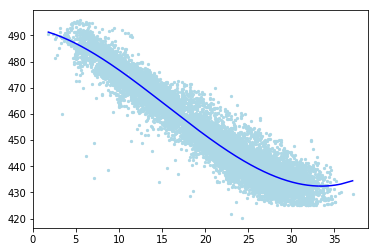

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:17   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

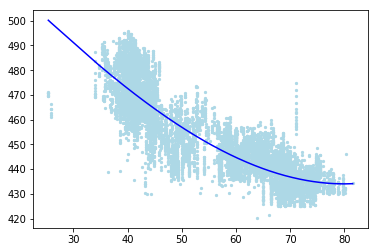

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:18   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

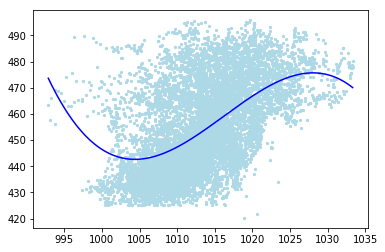

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:18   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

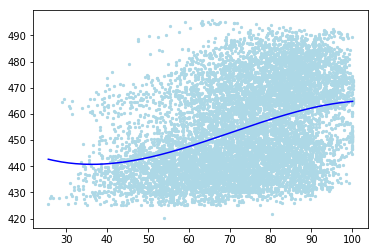

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:18   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [25]:
from sklearn.preprocessing import PolynomialFeatures
for i in model_use:
    list_model =  []
    for j in range(len(i)):
        list_model.append((i[j], PE[j]))
    list_model.sort(key=lambda list_model: list_model[0]) 

    Training_set = []
    Training_label = []    
    for k in range(len(list_model)):
        Training_set.append(list_model[k][0])
        Training_label.append(list_model[k][1])
    Training_set = np.array(Training_set)
    Training_label = np.array(Training_label)

    poly_reg = PolynomialFeatures(degree = 3)
    X_poly = poly_reg.fit_transform(Training_set.reshape(-1, 1))
    model_poly = LinearRegression()
    model_poly.fit(X_poly, Training_label.reshape(-1, 1))
    y_pred = model_poly.predict(X_poly)
    
    X3 = sm.add_constant(Training_set.reshape(-1, 1)) #data_sheet1_df[columns]
    est_3 = sm.OLS(Training_label, X3)
    est_3 = est_3.fit()

    plt.scatter(i, PE, s = 5, color = 'lightblue')
    plt.plot(Training_set, y_pred, color = 'blue')
    plt.show() 
    print(est_3.summary())

There is evidence that all the p-value above is less than 0.05.

### (g) Is there evidence of association of interactions of predictors with the response? To
### answer this question, run a full linear regression model with all pairwise interaction
### terms and state whether any interaction terms are statistically significant.

In [26]:
pairwise = []
for i in model_use:
    pairwise.append(i)
for i in range(len(model_use)):
    for j in range(len(model_use)):
        if j > i:
            pairwise.append(model_use[i] * model_use[j])
            

In [27]:
columns_pairwise = []
for i in range(len(columns)):
    for j in range(len(columns)):
        if i < j:
            columns_pairwise.append(columns[i] + '&' + columns[j])

columns_pairwise = columns + columns_pairwise
columns_pairwise

['AT', 'V', 'AP', 'RH', 'AT&V', 'AT&AP', 'AT&RH', 'V&AP', 'V&RH', 'AP&RH']

In [28]:
pairwise = np.array(pairwise)
model_pairwise = LinearRegression()
model_pairwise.fit(pairwise.T, PE)
pairwise_y_pred = model_pairwise.predict(pairwise.T)
a_pairwise = model_pairwise.coef_
b_pairwise = model_pairwise.intercept_
print(a_pairwise,b_pairwise, '\n')

X2_pairwise = sm.add_constant(pairwise.T)
est_pairwise = sm.OLS(PE, X2_pairwise)
est2_pairwise = est_pairwise.fit()
print(est2_pairwise.summary(), '\n')

print('For the P-Value which is less than 0.05 in interaction terms, they are statistically significant:', 'AT&V, AT&RH, V&AP, AP&RH', '\n')

[-4.34701412e+00 -7.67485763e+00 -1.52354642e-01  1.57090705e+00
  2.09709231e-02  1.75904518e-03 -5.23035364e-03  6.81235433e-03
  8.38633179e-04 -1.61179894e-03] 685.7824681467212 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:18   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    s

In [29]:
collect_pairwaise=[]
for i in range(1,len(est2_pairwise.pvalues)):
    if est2_pairwise.pvalues[i] < 0.05:
        collect_pairwaise.append(columns_pairwise[i-1])
print(collect_pairwaise)

['V', 'AP', 'RH', 'AT&V', 'AT&RH', 'V&AP', 'AP&RH']


### (h) Can you improve your model using possible interaction terms or nonlinear associations 
### between the predictors and response? Train the regression model on a randomly selected 70% 
### subset of the data with all predictors. Also, run a regression model involving all possible 
### interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values 
### (be careful about interaction terms). 
### Test both models on the remaining points and report your train and test MSEs.

## The regression model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data_sheet1_np[:,:4], data_sheet1_np[:,4], \
                                                    random_state = 100, test_size=.7 )
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_reg.predict(X_test_reg)
y_pred_reg_train = model_reg.predict(X_train_reg)
intercept_reg = model_reg.intercept_
coef_reg = model_reg.coef_
print(intercept_reg, coef_reg)

X2_reg = sm.add_constant(X_train_reg)
est_reg = sm.OLS(y_train_reg, X2_reg)
est2_reg = est_reg.fit()
print(est2_reg.summary(), '\n')

train_MSE_reg = sum(((y_pred_reg_train - y_train_reg) ** 2))/len(y_pred_reg_train)
test_MSE_reg = sum(((y_pred_reg - y_test_reg) **2))/len(y_pred_reg)
print('Training error MSE:', train_MSE_reg, 'Test error MSE:',test_MSE_reg)

490.7366659290539 [-1.99622814 -0.23536844  0.02778533 -0.1701078 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     9508.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:18   Log-Likelihood:                -8402.3
No. Observations:                2870   AIC:                         1.681e+04
Df Residuals:                    2865   BIC:                         1.684e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

## A regression model involving all possible interaction terms and quadratic nonlinearities

In [31]:
reg2 = []
for i in model_use:
    reg2.append(i)
for i in range(len(model_use)):
    for j in range(len(model_use)):
        if j >= i:
            reg2.append(model_use[i] * model_use[j])
columns_reg2 = []
for i in range(len(columns)):
    for j in range(len(columns)):
        if j >= i:
            columns_reg2.append(columns[i] + '&' + columns[j])

columns_reg2 = columns + columns_reg2

In [32]:
X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2 = train_test_split(np.array(reg2).T, data_sheet1_np[:,4], \
                                                    random_state = 100, test_size=.7 )

model_reg2 = LinearRegression()
model_reg2.fit(X_train_reg2, y_train_reg2)
y_pred_reg2 = model_reg2.predict(X_test_reg2)
y_pred_reg2_train = model_reg2.predict(X_train_reg2)
intercept_reg2 = model_reg2.intercept_
coef_reg2 = model_reg2.coef_
print(intercept_reg2, coef_reg2)

X2_reg2 = sm.add_constant(X_train_reg2)
est_reg2 = sm.OLS(y_train_reg2, X2_reg2)
est2_reg2 = est_reg2.fit()
print(est2_reg2.summary(), '\n')

train_MSE_reg2 = sum(((y_pred_reg2_train - y_train_reg2) ** 2))/len(y_pred_reg2_train)
test_MSE_reg2 = sum(((y_pred_reg2 - y_test_reg2) **2))/len(y_pred_reg2)
print('Training error MSE:', train_MSE_reg2, 'Test error MSE:',test_MSE_reg2)

collect_remove = []
for i in range(4,len(est2_reg2.pvalues)):
    if est2_reg2.pvalues[i] > 0.05:
        collect_remove.append(columns_reg2[i-1])
        print(i-1)
print('Remove insignificant variables :', collect_remove)

-11381.824465923964 [-2.63411724e+00 -3.35833336e+00  2.31762745e+01  5.20757764e+00
  1.40259652e-02  1.28819759e-02  5.51673290e-05 -6.51413487e-03
 -8.98968806e-04  2.80850455e-03  6.41061150e-04 -1.12860030e-02
 -4.89361203e-03 -1.96858703e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3151.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:18   Log-Likelihood:                -8198.5
No. Observations:                2870   AIC:                         1.643e+04
Df Residuals:                    2855   BIC:                         1.652e+04
Df Model:                          14                                         
Covariance Type:            nonrobust   

In [33]:
reg3 = []
reg3_nums = [6,8,9,10]
for i in range(len(reg2)):
    if i not in reg3_nums:
        reg3.append(reg2[i])
X_train_reg3, X_test_reg3, y_train_reg3, y_test_reg3 = train_test_split(np.array(reg3).T, data_sheet1_np[:,4], \
                                                    random_state = 100, test_size=.7 )

model_reg3 = LinearRegression()
model_reg3.fit(X_train_reg3, y_train_reg3)
y_pred_reg3 = model_reg3.predict(X_test_reg3)
y_pred_reg3_train = model_reg3.predict(X_train_reg3)
intercept_reg3 = model_reg3.intercept_
coef_reg3 = model_reg3.coef_
print(intercept_reg3, coef_reg3)

X2_reg3 = sm.add_constant(X_train_reg3)
est_reg3 = sm.OLS(y_train_reg3, X2_reg3)
est2_reg3 = est_reg3.fit()
print(est2_reg3.summary(), '\n')

train_MSE_reg3 = sum(((y_pred_reg3_train - y_train_reg3) ** 2))/len(y_pred_reg3_train)
test_MSE_reg3 = sum(((y_pred_reg3 - y_test_reg3) **2))/len(y_pred_reg3)
print('Training error MSE:', train_MSE_reg3, 'Test error MSE:',test_MSE_reg3)

-13083.39577432567 [-2.46956664e+00 -4.81983463e-01  2.63331911e+01  5.93943395e+00
  1.63626555e-02  8.69880004e-03 -6.24392306e-03 -1.27470155e-02
 -5.58706385e-03 -1.97757860e-03]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     4413.
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:55:18   Log-Likelihood:                -8200.0
No. Observations:                2870   AIC:                         1.642e+04
Df Residuals:                    2859   BIC:                         1.649e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    st

### (i) KNN Regression:
### i. Perform k-nearest neighbor regression for this dataset using both normalized
### and raw features. Find the value of k if from {1; 2; : : : ; 100} that gives you the
### best fit. Plot the train and test errors in terms of 1/k.

In [34]:
data_sheet1_np[:,:4]

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [35]:
k_reciprocal = []
for i in range(1,101):
    k_reciprocal.append(1/i)

Best fit k is : 7 , and the MSE error is : 19.427331904436883


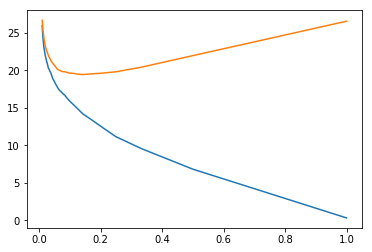

In [36]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(data_sheet1_np[:,:4], \
                                                    data_sheet1_np[:,4], test_size = 0.7, random_state = 100)

error_numbers_test = 100
error_numbers_training = 100
test_error = []
training_error = []
suitable_k = 0

for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(X_train, y_train.astype('int')) 
    y_pred_KNN = neigh.predict(X_test)
    y_pred_KNN_train = neigh.predict(X_train)

    train_MSE_KNN = sum(((y_pred_KNN_train - y_train) ** 2))/len(y_pred_KNN_train)
    training_error.append(train_MSE_KNN)
    test_MSE_KNN = sum(((y_pred_KNN - y_test) **2))/len(y_pred_KNN)
    test_error.append(test_MSE_KNN)
    
    if test_MSE_KNN < error_numbers_test:
        error_numbers_test = test_MSE_KNN
        suitable_k = i

print('Best fit k is :', suitable_k , ', and the MSE error is :',error_numbers_test)
plt.plot(k_reciprocal, training_error)
plt.plot(k_reciprocal, test_error)
plt.show()


#for i in range(1,101):
#neigh = KNeighborsClassifier(n_neighbors = i)
#neigh.fit(X_train, y_train.astype('int')) 
#test_error.append(neigh.score(X_test,y_test))
#if neigh.score(X_test,y_test) < error_numbers:
#    error_numbers = neigh.score(X_test,y_test)
#    suitable_k = i
#   k_star_predict = neigh.predict(X_test)
#print("suitable k is:", suitable_k, ", test errors :", error_numbers)

In [37]:
normalized_data = []
for i in range(5):
    normalized_data.append((data_sheet1_np[:,i]-statistics.mean(data_sheet1_np[:,i]))/statistics.stdev(data_sheet1_np[:,i]))
normalized_data = np.array(normalized_data)

Best fit k is : 23 , and the MSE error is : 0.2741396534764866


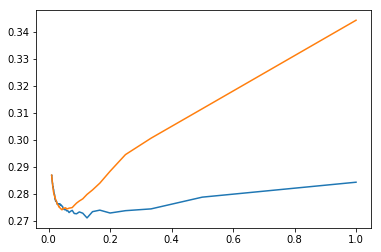

In [38]:
from sklearn.neighbors import KNeighborsRegressor
X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(normalized_data[:4][:].T, \
                                                    normalized_data[4][:].T, test_size = 0.7, random_state = 100)

error_numbers_test_nor = 100
error_numbers_training_nor = 100
test_error_nor = []
training_error_nor = []
suitable_k_nor = 0

for i in range(1,101):
    neigh_nor = KNeighborsRegressor(n_neighbors = i)
    neigh_nor.fit(X_train_nor, y_train_nor.astype('int')) 
    y_pred_KNN_nor = neigh_nor.predict(X_test_nor)
    y_pred_KNN_train_nor = neigh_nor.predict(X_train_nor)

    train_MSE_KNN_nor = sum(((y_pred_KNN_train_nor - y_train_nor) ** 2))/len(y_pred_KNN_train_nor)
    training_error_nor.append(train_MSE_KNN_nor)
    test_MSE_KNN_nor = sum(((y_pred_KNN_nor - y_test_nor) **2))/len(y_pred_KNN_nor)
    test_error_nor.append(test_MSE_KNN_nor)
    
    if test_MSE_KNN_nor < error_numbers_test_nor:
        error_numbers_test_nor = test_MSE_KNN_nor
        suitable_k_nor = i

print('Best fit k is :', suitable_k_nor , ', and the MSE error is :',error_numbers_test_nor)
plt.plot(k_reciprocal, training_error_nor)
plt.plot(k_reciprocal, test_error_nor)
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(normalized_data[:][:4].T, normalized_data[:][4], test_size=0.7, random_state=45)

### (j) Compare the results of KNN Regression with the linear regression model that has
### the smallest test error and provide your analysis.

Best fit k for KNN is : 7 , the MSE error is : 19.427331904436883
Test error MSE for the linear regression model is : 20.97313272265646
The MSE will be small if the predicted responses are very close to the true responses, and will be large if for some of the observations, the predicted and true responses differ substantially. Since the lowest MSE for KNN is near to the linear regression model. I consider the KNN regression model will be useful in this kind of situation.

## 2. ISLR: 2.4.1
### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible 
### statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

Since the predictors are small and  the sample size are big enough to predict, 
a flexible model may not have a big chance lead to overfitting. 

(b) The number of predictors p is extremely large, and the number of observations n is small.

The restrictive model are much more interpretable when the predictors are large.
It would be a better way to choose inflexible method.

(c) The relationship between the predictors and response is highly non-linear.

If the relationship between the predictors and response is highly non-linear, then it would not be possible to produce an accurate regression line because it could cause high bias. As a result, a flexible methods may result in less bias and could be more useful.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

If a method has high variance then small changes in the training data can result in large changes in F, thus a inflexible method would be better.

## 3. ISLR: 2.4.7
### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
### Obs. X1 X2 X3   Y
###    1     0    3   0  Red
###    2     2    0   0  Red
###    3     0    1   3  Red
###    4     0    1   2  Green
###    5   −1    0   1  Green
###    6     1    1   1  Red
### Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [39]:
E_set = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])

In [40]:
import math
Y_predict = np.array([0, 0, 0])
for i in E_set:
    distance = math.sqrt(sum(np.square((Y_predict - i))))
    print('Distance with',i, 'is',distance)

Distance with [0 3 0] is 3.0
Distance with [2 0 0] is 2.0
Distance with [0 1 3] is 3.1622776601683795
Distance with [0 1 2] is 2.23606797749979
Distance with [-1  0  1] is 1.4142135623730951
Distance with [1 1 1] is 1.7320508075688772


(b) What is our prediction with K = 1? Why?

while k = 1, the nearest point is [-1, 0, 1]. Thus, we would predict [0, 0, 0] as green.

(c) What is our prediction with K = 3? Why?

while k = 3, the nearest point is [-1, 0, 1], [1, 1, 1], and [2, 0, 0]. 
The color of them are Green, Red, Red. Red appears more than Green.
Thus, we would predict [0, 0, 0] as Red.

(d) If the Bayes decision boundary in this problem is highly nonlinear,
then would we expect the best value for K to be large or small? Why?

 If it is highly nonlinear, a small k would be better because it can only change little from the point near itself.

In [41]:
lis = [1,2]

In [42]:
lis.T

AttributeError: 'list' object has no attribute 'T'